Examine rating data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import Data, Visualisation
import seaborn as sns
folder = 'rating'

/tmp/ipykernel_408455/2063128851.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_trial_sorted_all = df_trial_sorted_all.append(df_trial_sorted)
/tmp/ipykernel_408455/2063128851.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_trial_sorted_all = df_trial_sorted_all.append(df_trial_sorted)
/tmp/ipykernel_408455/2063128851.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_trial_sorted_all = df_trial_sorted_all.append(df_trial_sorted)
/tmp/ipykernel_408455/2063128851.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_trial_sorted_all = df_trial_sorted_all.append(df_trial_sorted)
/tmp/ipykernel_408455/2063128851.py:

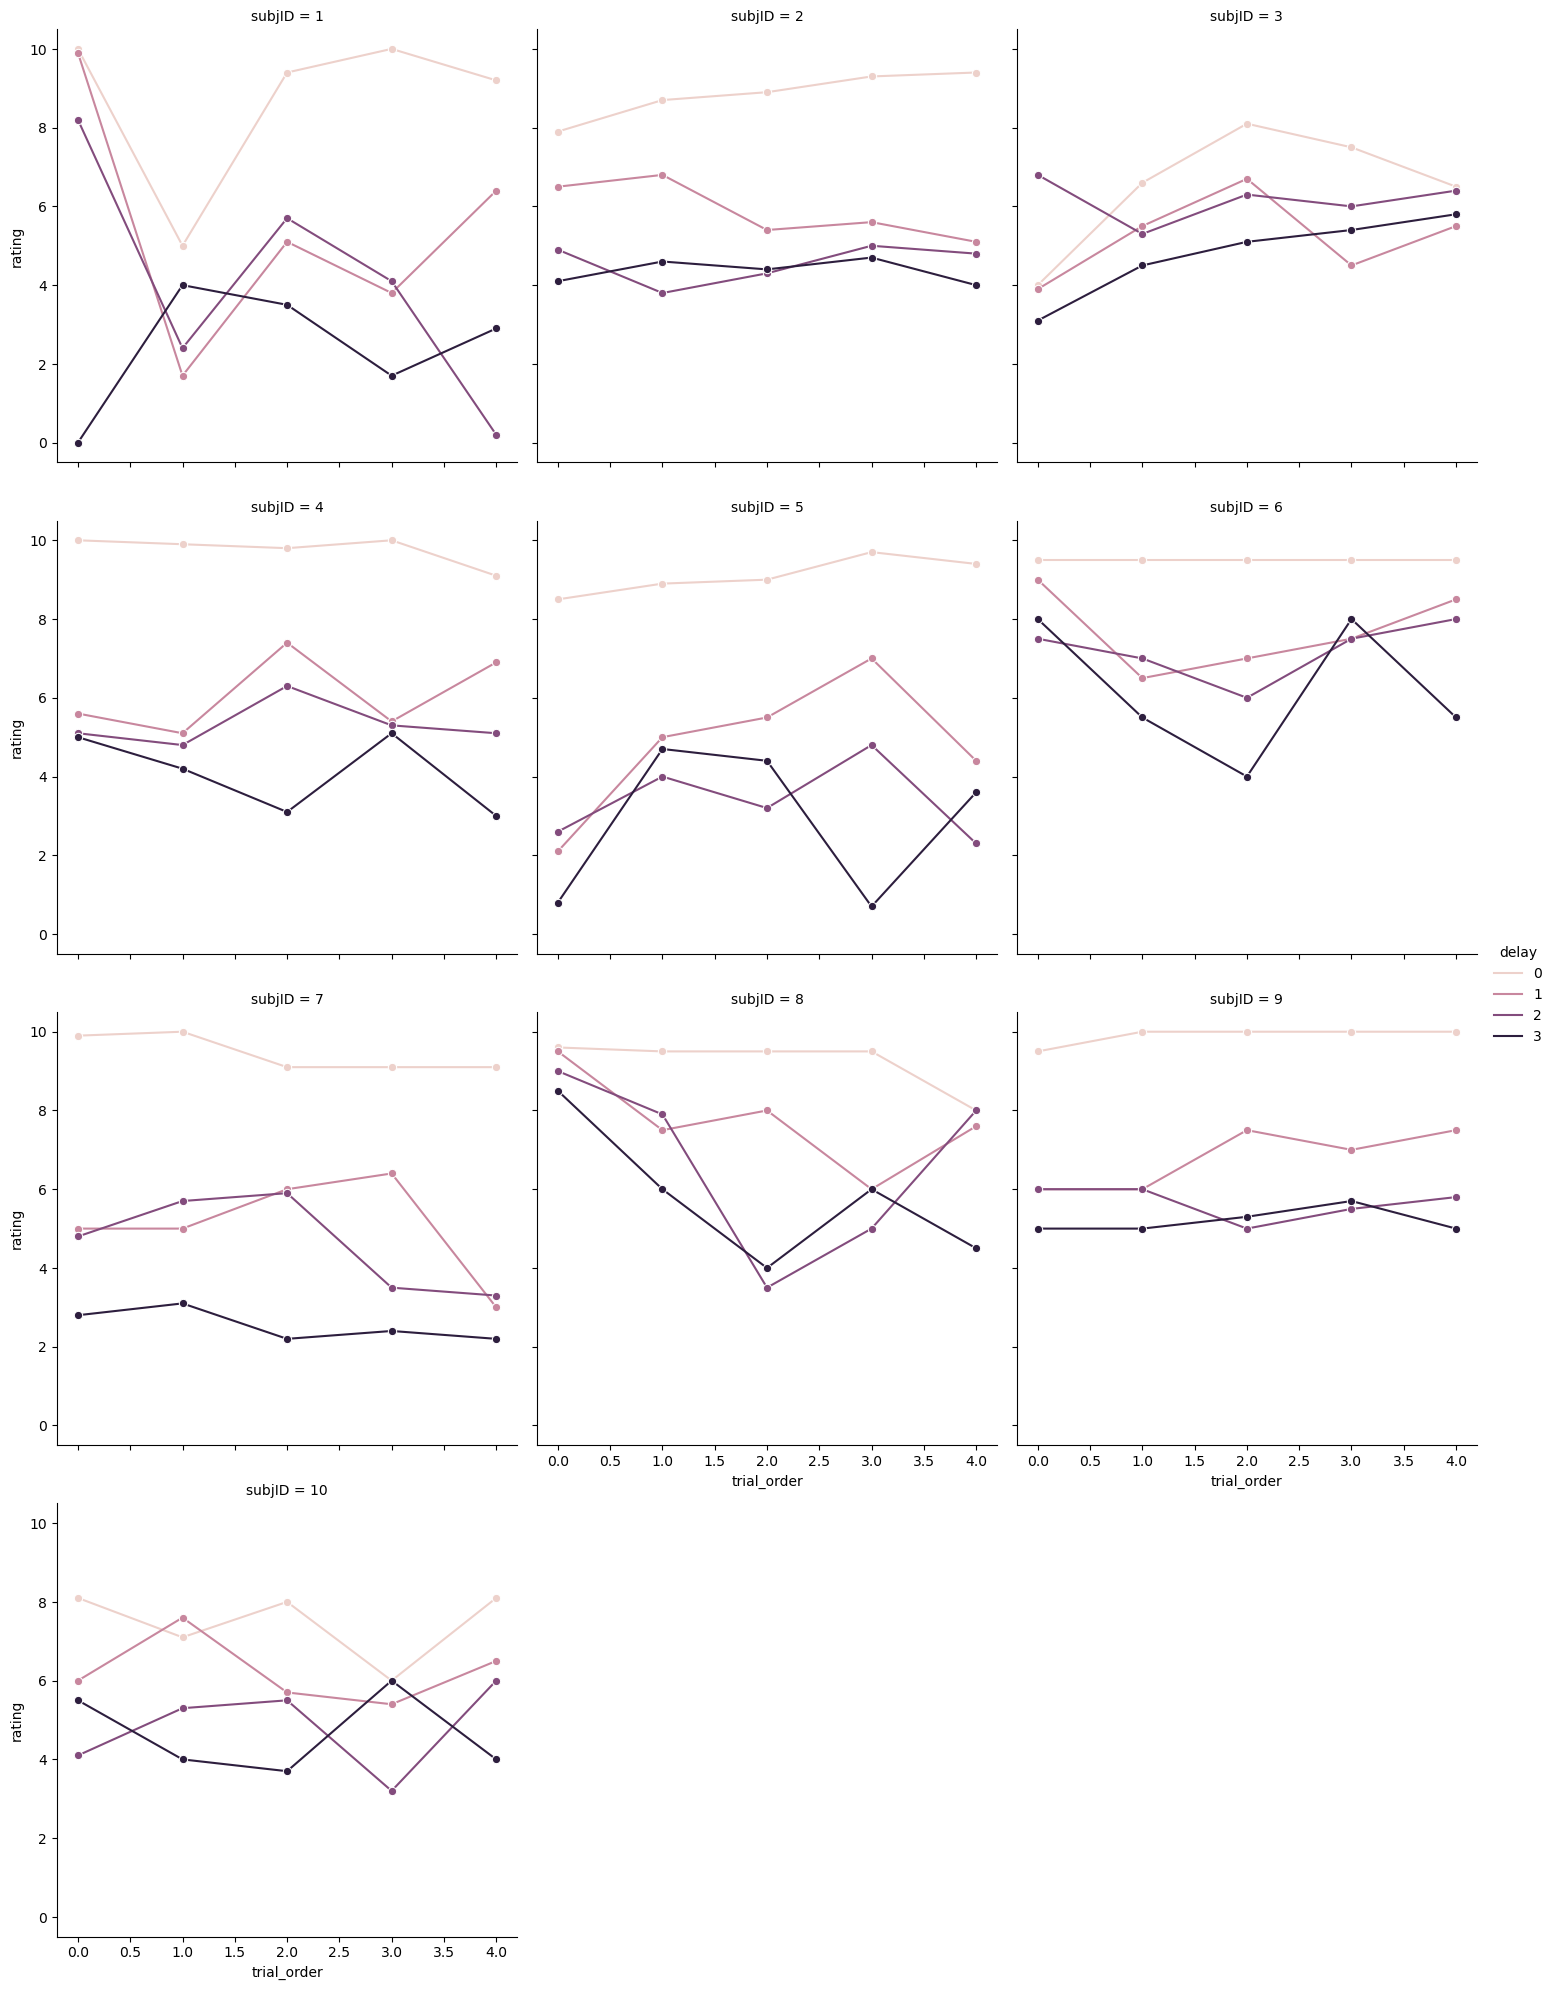

In [5]:
subjIDs = range(1, 11)
phase = 2

df_trial_sorted_all = pd.DataFrame()
for subjID in subjIDs:
    
    df_trial = Data.loadTrainInfo(subjID, phase, addSubjID=True)
    # We can get three columnms from df_trial: [trial	delay	rating]

    # sort df_trial by delay then trial
    df_trial_sorted = df_trial.sort_values(by=['delay', 'trial'], inplace=False)

    # for each delay, add a column of trial trial_order
    df_trial_sorted['trial_order'] = df_trial_sorted.groupby('delay').cumcount()

    # ungroup
    df_trial_sorted.reset_index(drop=True, inplace=True)
    
    # append to df_trial_sorted_all
    df_trial_sorted_all = df_trial_sorted_all.append(df_trial_sorted)



# plot x: trial_order, y: rating, color: delay
# line with marker using seaborn 
# subjcets are subplots
g = sns.relplot(data=df_trial_sorted_all, x='trial_order', y='rating', hue='delay', marker='o', col='subjID', col_wrap=3, kind='line')


# sns.lineplot(data=df_trial_sorted, x='trial_order', y='rating', hue='delay', marker='o')